# 1. Reading the data

- Importing the essential libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- Importing the dataset.

In [2]:
df = pd.read_csv('Leads.csv')

- Reading the dimensions of the initial dataset.

In [3]:
df.shape

(9240, 37)

- Reading the initial rows.

In [4]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

- Listing out the data types involved and other details.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Reading the parameters of numerical data.

In [6]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

- Fetching the column names set for extracting the required ones in other use cases.

In [7]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# 2. Cleaning and visualizing the data

- Removing data added by the sales team to obtain the original data set for modeling.

    We are doing this so as to build a model on the initial data set received, and not on the one modified by the sales team.

    The resulting model can be used in the future on the dataset directly, prior to the involvement of sales team.

In [8]:
df = df.drop(['Tags','Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score','Last Activity','Last Notable Activity', 'Lead Profile'], 1)

- Categorising Yes/No type columns to 0/1 type columns for numerical analysis.

In [9]:
varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
           'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

def binary(x):
    return x.map({'Yes':1, 'No': 0})

df[varlist] = df[varlist].apply(binary)

- We see a lot of 'Select' fields in various columns indicating a default entry. We can replace them with null values.

In [10]:
df = df.replace('Select', np.nan)

- Finding out the null value percentage of all the columns.

In [11]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Removing the columns having more than 40% of null values.

In [12]:
cols = df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(i, 1, inplace = True)

- Finding out the unique count of all the columns. We can remove the columns having only one unique value.

In [13]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

- Removing the columns having only one unique value, as there can be no discernible patterns with using them.

In [14]:
df = df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
               'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Prospect ID', 'Lead Number'], 1)

- Finding out the null value count of the remaining columns.

In [15]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
City      

- Checking the spread of data, i.e. the value counts in the columns having more than 25% missing values.

In [16]:
varlist = ['Country', 'Specialization', 'What is your current occupation', 
           'What matters most to you in choosing a course', 'City']

for i in varlist:
    print(df[i].value_counts(normalize=True, dropna=False))
    print('\n')

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Germany                 0.000433
Nigeria                 0.000433
Kuwait                  0.000433
Canada                  0.000433
South Africa            0.000433
Sweden                  0.000325
Bangladesh              0.000216
Uganda                  0.000216
Ghana                   0.000216
Philippines             0.000216
Italy                   0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Netherlands             0.000216
Belgium                 0.000216
Denmark                 0.000108
Russia    

- Dropping the highly skewed columns as seen through the value counts. Patterns derived using these columns will not be representative in nature.

Dropping the 'What matters most to you in choosing a course' column having 99% of data towards 'Better Career Prospects' with imputation.

In [17]:
df = df.drop('What matters most to you in choosing a course', 1)

Dropping the 'Country' column having 96% of the data towards 'India' with imputation.

In [18]:
df = df.drop('Country', 1)

## Categorical variable analysis:

- **Analysing 'City'**

- Imputing the null value fields in 'City' with the mode which is 'Mumbai'

In [19]:
df.City = df.City.replace(np.nan, 'Mumbai')

- Checking the spread of data in 'City' column

In [20]:
df.City.value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

- Let's plot 'City' against our target variable to see the patterns

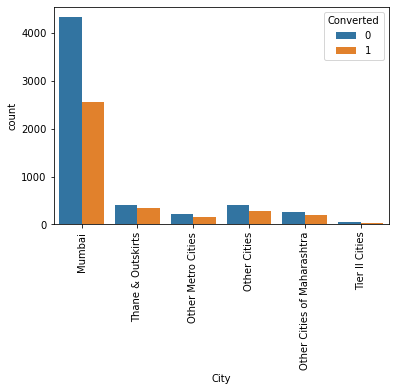

In [21]:
sns.countplot(df.City, hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

**Inference** - Not a lot of patterns seen through this plot. 

Mumbai has the most number of leads in terms of absolute numbers, while other cities have a better conversion rate. Moving on.

- **Analysing 'What is your current occupation'**

- Imputing the null value fields in 'What is your current occupation' with the mode which is 'Unemployed'

In [22]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

- Checking the spread of data in our column

In [23]:
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

- Let's group the fields with less than 1% values into 'Other'

In [24]:
df['What is your current occupation'] = df['What is your current occupation'].replace('Housewife', 'Other')
df['What is your current occupation'] = df['What is your current occupation'].replace('Businessman','Other')

- Let's now plot it against our target variable to see the patterns

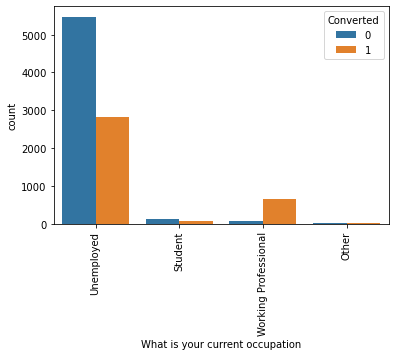

In [25]:
sns.countplot(df['What is your current occupation'], hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

**Inference -**

We can see that most number of leads are Unemployed in terms of absolute numbers, while Working professionals have a very high conversion rate.

- **Analysing 'Specialization'**

- Imputing the null value fields in 'Specialization' with 'Not specified'

In [26]:
df.Specialization = df.Specialization.replace(np.nan, 'Not Specified')

- Let's plot it against our target variable and see the patterns

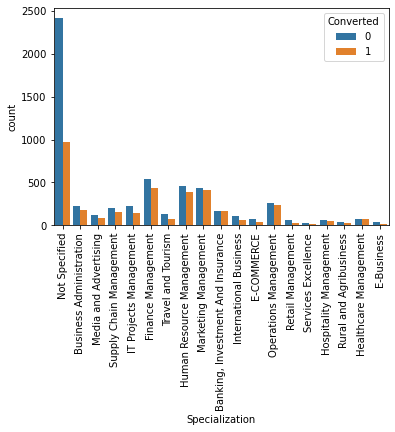

In [27]:
sns.countplot(df.Specialization, hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

- We can group the management course into one group as they are having similar patterns, in order to improve the dummy variable setup later.

In [28]:
df.Specialization = df.Specialization.replace(['Finance Management', 'Human Resource Management', 'Marketing Management',
                                              'Operations Management', 'IT Projects Management', 'Supply Chain Management',
                                              'Healthcare Management','Hospitality Management', 'Retail Management'], 
                                              'Management Courses')
df.Specialization = df.Specialization.replace(['Rural and Agribusiness', 'E-Business', 'Services Excellence'], 
                                              'Other Courses')

- Let's plot it once again to see any changes in the distribution

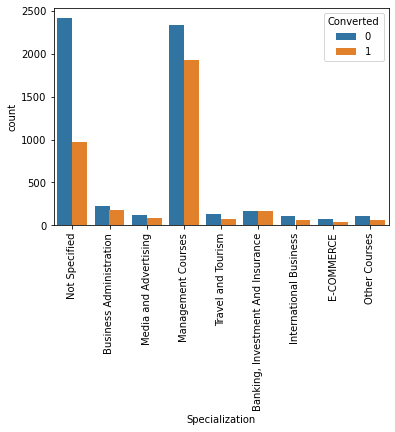

In [29]:
sns.countplot(df.Specialization, hue = df.Converted)
plt.xticks(rotation=90)
plt.show()

**Inference -**

- We see the Management courses have the highest conversion in terms of absolute numbers. 'Not specified' is the most prevalent field.

- ‘Banking, Investment and Insurance’ has the highest conversion rate.

- **Analysing 'Lead Origin'** 

- Checking the data spread in our column

In [30]:
df['Lead Origin'].value_counts(normalize=True, dropna=False)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

- Checking the distribution against our target variable

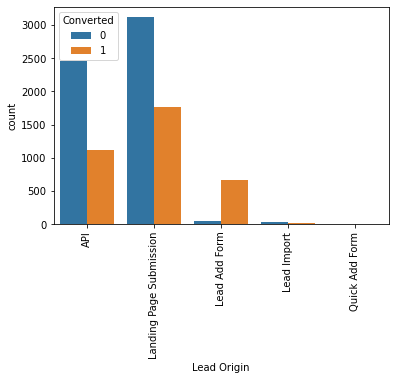

In [31]:
sns.countplot(df['Lead Origin'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

**Inference** -

- API and Landing Page Submission has higher number of leads in terms of absolute numbers.

- Lead add form has a very high conversion rate but relatively very less number of leads.

- Lead Import and Quick Add Form has even lesser leads to even find a pattern.

- **Analysing 'Lead Source'**

- Checking the data spread in our column

In [32]:
df['Lead Source'].value_counts(normalize=True, dropna=False)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Social Media         0.000216
Live Chat            0.000216
Press_Release        0.000216
blog                 0.000108
testone              0.000108
WeLearn              0.000108
welearnblog_Home     0.000108
Pay per Click Ads    0.000108
youtubechannel       0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

- There is a high number of columns in Lead Source. We can group them together to improve data visualization.
    
    Let's impute null value fields with the mode i.e. 'Google' 
    
    Let's group the fields with less than 1% values into 'Other Sources'
    
    Let's impute smallcase 'google' with 'Google'

In [33]:
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release', 'youtubechannel','welearnblog_Home',
                                               'WeLearn','blog','Pay per Click Ads','testone','NC_EDM', 'Live Chat', 
                                               'Facebook', 'Social Media'],
                                              'Other Sources')         

- Let's plot our column against the target variable

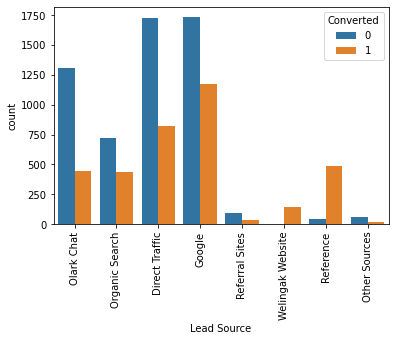

In [34]:
sns.countplot(df['Lead Source'], hue=df.Converted)
plt.xticks(rotation=90)
plt.show()

**Inference -**

- Google and Direct Traffic are generating the most number of leads compared to other categories.

- Conversion rate of Welingak Website and Reference is very high.

- Olark Chat and Organic Search also have a good amount of leads.

## Numerical Variable Analysis :

* Let's start with a heatmap to find out the correlation between variables.

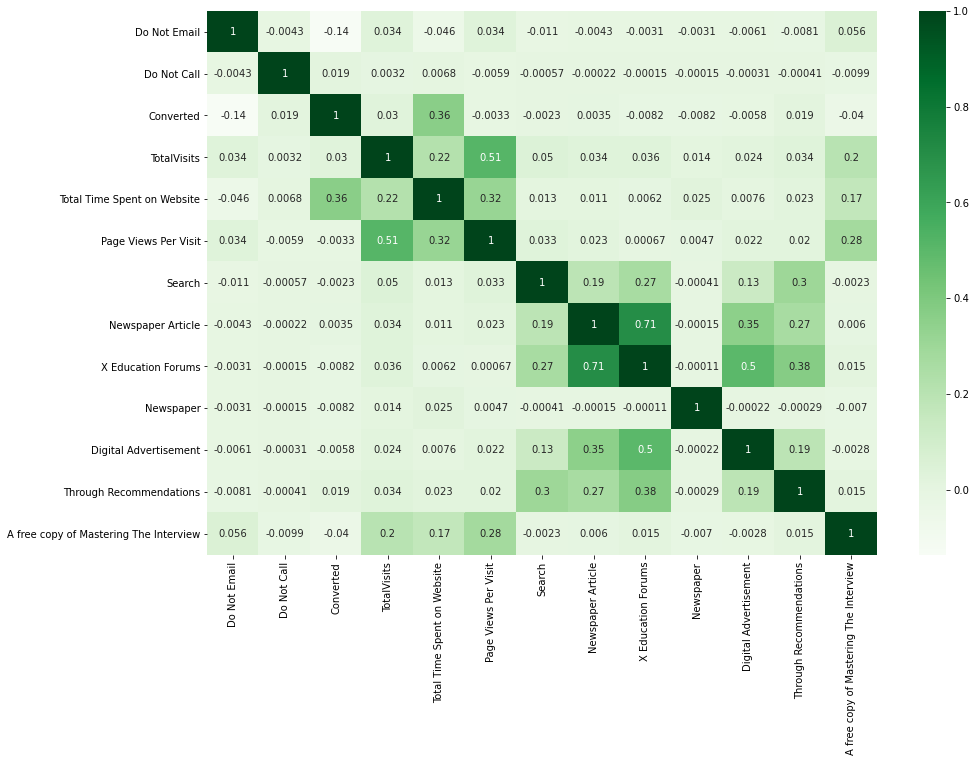

In [35]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

**Inference -**

- We see that the total time spent has the highest correlation with our target variable 'Converted', followed by 'Total Visits'. 
    
    'Do Not Email' has the highest negative correlation.

- Let's now check the data spread for numerical columns of binary type, i.e. the categorical columns of yes/no type converted to numerical during cleaning 

In [36]:
varlist = ['Do Not Email', 'Do Not Call', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

for i in varlist:
    print(df[i].value_counts(normalize=True, dropna=False))
    print('\n')

0    0.920563
1    0.079437
Name: Do Not Email, dtype: float64


0    0.999784
1    0.000216
Name: Do Not Call, dtype: float64


0    0.998485
1    0.001515
Name: Search, dtype: float64


0    0.999784
1    0.000216
Name: Newspaper Article, dtype: float64


0    0.999892
1    0.000108
Name: X Education Forums, dtype: float64


0    0.999892
1    0.000108
Name: Newspaper, dtype: float64


0    0.999567
1    0.000433
Name: Digital Advertisement, dtype: float64


0    0.999242
1    0.000758
Name: Through Recommendations, dtype: float64


0    0.687446
1    0.312554
Name: A free copy of Mastering The Interview, dtype: float64




- We see a good number of columns with highly skewed distribution. 

    It would be safe to drop them as they do not contribute to any insights.

In [37]:
df = df.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
             'Through Recommendations'], 1)

- With the cleaning in place, let's check our dataframe once again

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   City                                    9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

- We can see a few null values still in place. Let's verify them

In [39]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Specialization                              0
What is your current occupation             0
City                                        0
A free copy of Mastering The Interview      0
dtype: int64

- We can impute the data in the only columns having null values which are 'TotalVisits' and 'Page Views Per Visit' with their median

In [40]:
df.TotalVisits = df.TotalVisits.replace(np.nan, df.TotalVisits.median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, df['Page Views Per Visit'].median())

- Let's verify our null value imputation

In [41]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
dtype: int64

- All good. Let us now extract the numerical columns into a separate dataframe for the numerical variable analysis part

In [42]:
num_df = df.select_dtypes(include=['int64','float64'])
num_df.drop('Converted', axis=1, inplace=True)
num_df.shape

(9240, 5)

- With the numerical dataframe in place, let's do some outlier analysis

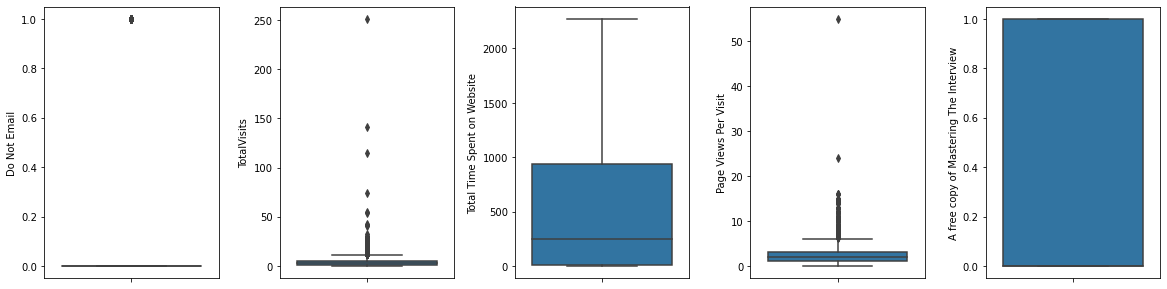

In [43]:
plt.figure(figsize=(20,5))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=num_df.columns[i], data=df)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=None)

- We can see that 'TotalVisits' and 'Page Views Per Visit' have outliers. Let's remove some of them

In [44]:
# We will remove the top 1% of the dataset

df = df[(df.TotalVisits <= df.TotalVisits.quantile(0.99))]
df = df[(df['Page Views Per Visit'] <= df['Page Views Per Visit'].quantile(0.99))]

- Let's now plot the distribution to see if it has made any difference

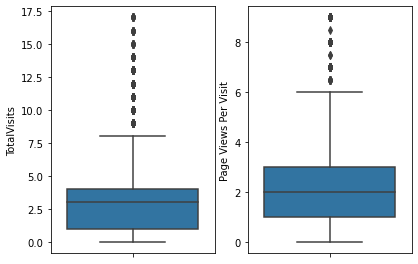

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.boxplot(y=df.TotalVisits, data=df)
plt.subplot(2,3,2)
sns.boxplot(y=df['Page Views Per Visit'], data=df)
plt.show()

- The outlier treatment result looks good.

    We can now proceed with the numerical variable analysis against our target variable. Let's do that through a boxplot

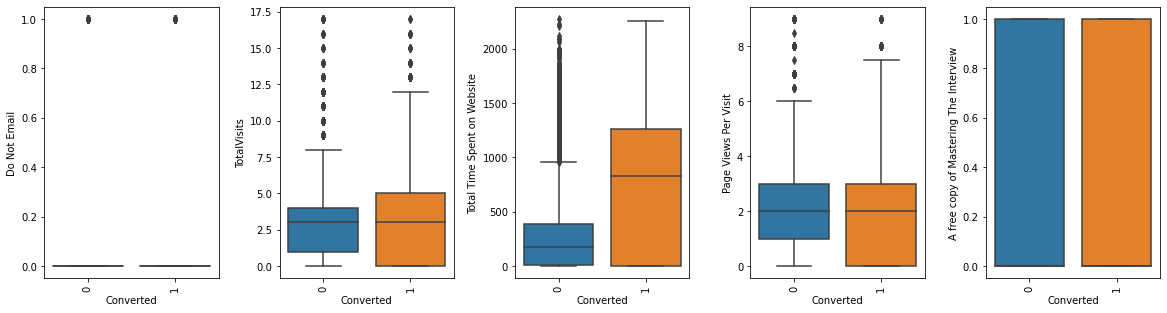

In [46]:
plt.figure(figsize=(20,5))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    sns.boxplot(x=df.Converted, y=num_df.columns[i], data=df)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=None)

**Inferences -**

- 'TotalVisits' and 'Page Views Per Visit' has almost the same median for both converted and non-converted leads. 


- 'Total Time Spent on Website' had a high positive correlation with 'Converted'. That can be seen in the boxplot as well.


- Nothing conclusive can be said about 'Do Not Email' and 'A free copy of Mastering The Interview'. 
    
    Let's view those two through a countplot.

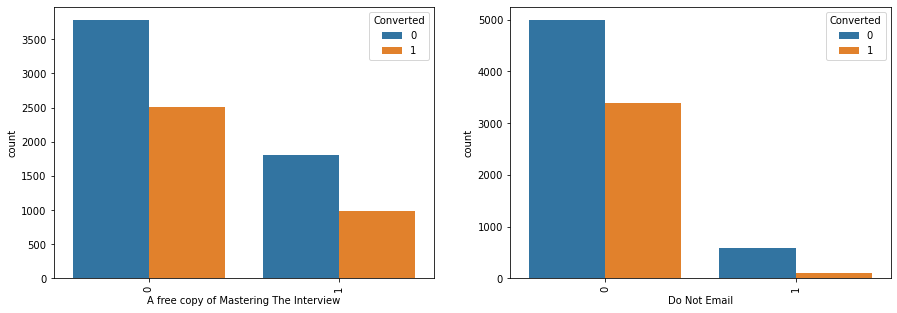

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(df['A free copy of Mastering The Interview'], hue=df.Converted)

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.countplot(df['Do Not Email'], hue=df.Converted)
plt.show()

**Inferences -**

- We see that the number of leads is higher in terms of absolute numbers in both of these when the free copy was not given, and the candidate chose not to be emailed. However, we cannot derive any insights for business actions from them.

Let us now check our final dataframe to be used for modeling.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Do Not Email                            9090 non-null   int64  
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Specialization                          9090 non-null   object 
 8   What is your current occupation         9090 non-null   object 
 9   City                                    9090 non-null   object 
 10  A free copy of Mastering The Interview  9090 non-null   int6

In [49]:
print("The total number of rows left in percentage after the data cleaning is:", (9090/9240)*100)
print("The total number of columns left in percentage after the data cleaning is:", (11/37)*100)

The total number of rows left in percentage after the data cleaning is: 98.37662337662337
The total number of columns left in percentage after the data cleaning is: 29.72972972972973


# 3. Data Preparation

## Dummy Variable Creation -

- Let's start with first running the pd.get_dummies() function on our categorical variables of 'Object' type

In [50]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City']], drop_first=True)

- We will now drop the original columns used for creating dummy variables

In [51]:
df = df.drop(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City'], axis =1)

- All good. Let's join the dummy dataframe with our origial dataframe

In [52]:
df = pd.concat([df, dummy], axis=1)

- Verifying the data types and columns in our dataframe after the dummy variable setup

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   float64
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   A free copy of Mastering The Interview                9090 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9090 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9090 non-null   uint8  
 8   Lead Origin_Lead Import                               9090

## Train_Test Split

- Importing the library to perform the train-test split for modelling

In [54]:
import sklearn
from sklearn.model_selection import train_test_split

- Let's start with splitting the dataframe into df_train and df_test with 7:3 ratio

In [55]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

- Verifying the shape for our new dataframes

In [56]:
print(df_train.shape)
print(df_test.shape)

(6363, 33)
(2727, 33)


- We will now import the target variable from our train set to 'y_train' and the rest of the dataframe to 'X_train'

In [57]:
y_train = df_train.pop('Converted')
X_train = df_train
print(y_train.shape)
print(X_train.shape)

(6363,)
(6363, 32)


## Scaling the train set

- Importing the library required for scaling and initializing our scaler function

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

- We will now obtain the numerical columns from our 'X_train' dataframe and scale them using Standard scaling

In [59]:
nums = X_train.select_dtypes(include=['int64','float64']).columns
X_train[nums] = scaler.fit_transform(X_train[nums])

# 4. Model Building

- Let's now import the statsmodel library and check our model, before doing an RFE analysis on the same

In [60]:
import statsmodels.api as sm

In [61]:
lr = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2926.5
Date:                Mon, 14 Jun 2021   Deviance:                       5853.0
Time:                        19:00:31   Pearson chi2:                 7.99e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7392      0.583      1.269      0.205      -0.403       1.881
Do Not Email                                            -0.3414      0.043     -7.915      0.000      -0.426      -0.257
TotalVisits                                              0.1613      0.045      3.550      0.000       0.072       0.250
Total Time Spent on Website                              1.0570      0.038     27.847      0.000       0.983       1.131
Page Views Per Visit                                    -0.0548      0.052     -1.048      0.295      -0.157       0.048
A free copy of Mastering The Interview                  -0.0896      0.047     -1.889      0.059      -0.183       0.003
Lead Origin_Landing Page Submission                     -0.6632      0.130     -5.112      0.000      -0.917      -0.409
Lead Origin_Lead Add Form                                4.5849      0.651      7.038      0.000       3.308       5.862
Lead Origin_Lead Import                                 -0.8917      0.849     -1.051      0.293      -2.555       0.772
Lead Origin_Quick Add Form                              18.2156   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                                       0.2475      0.108      2.286      0.022       0.035       0.460
Lead Source_Olark Chat                                   1.0618      0.152      6.969      0.000       0.763       1.360
Lead Source_Organic Search                               0.1460      0.124      1.179      0.238      -0.097       0.389
Lead Source_Other Sources                                0.6057      0.669      0.905      0.366      -0.706       1.918
Lead Source_Reference                                   -0.9220      0.682     -1.352      0.176      -2.258       0.414
Lead Source_Referral Sites                              -0.0923      0.324     -0.284      0.776      -0.728       0.544
Lead Source_Welingak Website                             2.5643      1.198      2.140      0.032       0.216       4.913
Specialization_Business Administration                  -0.3806      0.226     -1.686      0.092      -0.823       0.062
Specialization_E-COMMERCE                                0.1481      0.335      0.442      0.659      -0.509       0.805
Specialization_International Business                   -0.1914      0.279     -0.686      0.493      -0.738       0.355
Specialization_Management Courses                       -0.2173      0.172     -1.265      0.206      -0.554       0.120
Specialization_Media and Advertising                    -0.1213      0.270     -0.449      0.653      -0.651       0.408
Specialization_Not Specified                            -1

## Feature Selection using RFE

- Importing the required libraries and obtaining the top 15 variables using RFE

In [62]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [63]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

- Let's see the rankings for all the columns we have obtained after RFE selection

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other Sources', True, 1),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_International Business', False, 13),
 ('Specialization_Management Courses', False, 12),
 ('Specialization_Media and Advertising', False, 18),
 ('Specialization_Not Specified', True, 1),
 ('Specialization_Other Courses', False, 11),
 ('S

- Separating all the supported columns into 'col' list

In [65]:
col = X_train.columns[rfe.support_]

- Listing out all the columns which were eliminated by RFE

In [66]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Specialization_Business Administration',
       'Specialization_International Business',
       'Specialization_Management Courses',
       'Specialization_Media and Advertising', 'Specialization_Other Courses',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

### a) First Model

In [67]:
X_train_sm = sm.add_constant(X_train[col])
lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2941.3
Date:                Mon, 14 Jun 2021   Deviance:                       5882.7
Time:                        19:00:34   Pearson chi2:                 7.99e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5548      0.552      1.006      0.315      -0.526       1.636
Do Not Email                                            -0.3414      0.042     -8.108      0.000      -0.424      -0.259
Total Time Spent on Website                              1.0635      0.038     28.142      0.000       0.989       1.138
Lead Origin_Landing Page Submission                     -0.6702      0.126     -5.325      0.000      -0.917      -0.424
Lead Origin_Lead Add Form                                3.7416      0.217     17.255      0.000       3.317       4.167
Lead Origin_Lead Import                                 -0.9422      0.831     -1.134      0.257      -2.570       0.686
Lead Source_Google                                       0.3737      0.086      4.369      0.000       0.206       0.541
Lead Source_Olark Chat                                   1.0604      0.135      7.881      0.000       0.797       1.324
Lead Source_Organic Search                               0.2514      0.113      2.230      0.026       0.030       0.472
Lead Source_Other Sources                                0.7909      0.645      1.227      0.220      -0.473       2.055
Lead Source_Welingak Website                             3.3990      1.026      3.313      0.001       1.388       5.410
Specialization_E-COMMERCE                                0.3787      0.289      1.310      0.190      -0.188       0.945
Specialization_Not Specified                            -1.0540      0.116     -9.053      0.000      -1.282      -0.826
What is your current occupation_Student                 -1.0923      0.581     -1.880      0.060      -2.231       0.046
What is your current occupation_Unemployed              -1.1946      0.540     -2.211      0.027      -2.254      -0.135
What is your current occupation_Working Professional     1.4676      0.568      2.584      0.010       0.354       2.581
========================================================================================================================
"""

- Importing the required library for VIF and checking the VIF table for this model -

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
13         What is your current occupation_Unemployed  16.02
2                 Lead Origin_Landing Page Submission   7.73
11                       Specialization_Not Specified   4.64
4                             Lead Origin_Lead Import   3.29
8                           Lead Source_Other Sources   3.28
6                              Lead Source_Olark Chat   3.11
5                                  Lead Source_Google   2.33
3                           Lead Origin_Lead Add Form   2.27
14  What is your current occupation_Working Profes...   2.11
7                          Lead Source_Organic Search   1.51
12            What is your current occupation_Student   1.38
9                        Lead Source_Welingak Website   1.33
1                         Total Time Spent on Website   1.26
0                                        Do Not Email   1.03
10                          Specialization_E-COMMERCE   1.02

**Inference -**

We see that 'Lead Origin_Lead Import' has the highest p-value of 0.257. Let's start by dropping that column first -

In [70]:
col = col.drop('Lead Origin_Lead Import', 1)

- We will import the library to check the Model Evaluation metrices later -

In [71]:
from sklearn import metrics

- We will now predict our target variable using our first model -

In [72]:
y_train_pred = lr.fit().predict(X_train_sm)
y_train_pred[:10]

302     0.113943
6087    0.059644
1033    0.223017
7656    0.060218
3241    0.436163
5738    0.110015
7366    0.201639
3680    0.131285
4170    0.415181
43      0.206172
dtype: float64

- We will now create a new dataframe with the actual and predicted values of our target variable, and use the index of 'y_train' as StudentID

In [73]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred.values})
y_train_pred_final['StudentID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  StudentID
0          0        0.113943        302
1          0        0.059644       6087
2          0        0.223017       1033
3          0        0.060218       7656
4          1        0.436163       3241

- Let us now start with using 0.5 as the threshold probability and create a 'Predicted' column based on the predicted values

In [74]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  StudentID  Predicted
0          0        0.113943        302          0
1          0        0.059644       6087          0
2          0        0.223017       1033          0
3          0        0.060218       7656          0
4          1        0.436163       3241          0

- Moving on to building the confusion matrix for model evaluation metrics calculation :

In [75]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3479  456]
 [ 881 1547]]


- We will now obtain the true positives/negatives and false positives/negatives into variables to calculate Accuracy and Sensitivity :

In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity Score is:", TP / float(TP+FN))

Accuracy Score is: 0.7898789878987899
Sensitivity Score is: 0.6371499176276771


### b) Second Model

- We will repeat the same things we did in our first model to derive a better model.

In [78]:
X_train_sm = sm.add_constant(X_train[col])
lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2942.0
Date:                Mon, 14 Jun 2021   Deviance:                       5884.0
Time:                        19:00:34   Pearson chi2:                 7.99e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5457      0.552      0.989      0.323      -0.535       1.627
Do Not Email                                            -0.3410      0.042     -8.095      0.000      -0.424      -0.258
Total Time Spent on Website                              1.0640      0.038     28.154      0.000       0.990       1.138
Lead Origin_Landing Page Submission                     -0.6605      0.126     -5.262      0.000      -0.906      -0.414
Lead Origin_Lead Add Form                                3.7560      0.216     17.359      0.000       3.332       4.180
Lead Source_Google                                       0.3767      0.085      4.406      0.000       0.209       0.544
Lead Source_Olark Chat                                   1.0691      0.134      7.955      0.000       0.806       1.332
Lead Source_Organic Search                               0.2546      0.113      2.259      0.024       0.034       0.476
Lead Source_Other Sources                                0.2014      0.402      0.501      0.616      -0.587       0.989
Lead Source_Welingak Website                             3.3929      1.026      3.307      0.001       1.382       5.404
Specialization_E-COMMERCE                                0.3727      0.289      1.291      0.197      -0.193       0.939
Specialization_Not Specified                            -1.0524      0.116     -9.046      0.000      -1.280      -0.824
What is your current occupation_Student                 -1.0898      0.581     -1.876      0.061      -2.229       0.049
What is your current occupation_Unemployed              -1.1952      0.540     -2.211      0.027      -2.254      -0.136
What is your current occupation_Working Professional     1.4646      0.568      2.579      0.010       0.351       2.578
========================================================================================================================
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12         What is your current occupation_Unemployed  15.95
2                 Lead Origin_Landing Page Submission   7.70
10                       Specialization_Not Specified   4.64
5                              Lead Source_Olark Chat   3.09
4                                  Lead Source_Google   2.33
3                           Lead Origin_Lead Add Form   2.25
13  What is your current occupation_Working Profes...   2.10
6                          Lead Source_Organic Search   1.51
11            What is your current occupation_Student   1.38
8                        Lead Source_Welingak Website   1.33
1                         Total Time Spent on Website   1.26
7                           Lead Source_Other Sources   1.06
0                                        Do Not Email   1.03
9                           Specialization_E-COMMERCE   1.02

**Inference -**

We see that 'Lead Source_Other Sources' has the highest p-value of 0.616. We can drop it -

In [80]:
col = col.drop('Lead Source_Other Sources', 1)

In [81]:
y_train_pred = lr.fit().predict(X_train_sm)
y_train_pred[:10]

302     0.113104
6087    0.059739
1033    0.222124
7656    0.060294
3241    0.436257
5738    0.109967
7366    0.202147
3680    0.131240
4170    0.415264
43      0.206608
dtype: float64

In [82]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred.values})
y_train_pred_final['StudentID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  StudentID
0          0        0.113104        302
1          0        0.059739       6087
2          0        0.222124       1033
3          0        0.060294       7656
4          1        0.436257       3241

In [83]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  StudentID  Predicted
0          0        0.113104        302          0
1          0        0.059739       6087          0
2          0        0.222124       1033          0
3          0        0.060294       7656          0
4          1        0.436257       3241          0

In [84]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3478  457]
 [ 882 1546]]


In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity Score is:", TP / float(TP+FN))

Accuracy Score is: 0.7895646707527896
Sensitivity Score is: 0.6367380560131796


### c) Third Model -

- We will repeat the same things we did in our second model to derive a better model.

In [87]:
X_train_sm = sm.add_constant(X_train[col])
lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2942.1
Date:                Mon, 14 Jun 2021   Deviance:                       5884.2
Time:                        19:00:35   Pearson chi2:                 7.99e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5547      0.551      1.006      0.314      -0.526       1.635
Do Not Email                                            -0.3411      0.042     -8.098      0.000      -0.424      -0.259
Total Time Spent on Website                              1.0632      0.038     28.164      0.000       0.989       1.137
Lead Origin_Landing Page Submission                     -0.6672      0.125     -5.345      0.000      -0.912      -0.423
Lead Origin_Lead Add Form                                3.7482      0.216     17.370      0.000       3.325       4.171
Lead Source_Google                                       0.3705      0.085      4.381      0.000       0.205       0.536
Lead Source_Olark Chat                                   1.0581      0.133      7.983      0.000       0.798       1.318
Lead Source_Organic Search                               0.2484      0.112      2.217      0.027       0.029       0.468
Lead Source_Welingak Website                             3.3898      1.026      3.304      0.001       1.379       5.401
Specialization_E-COMMERCE                                0.3740      0.289      1.295      0.195      -0.192       0.940
Specialization_Not Specified                            -1.0530      0.116     -9.048      0.000      -1.281      -0.825
What is your current occupation_Student                 -1.0885      0.581     -1.873      0.061      -2.227       0.050
What is your current occupation_Unemployed              -1.1933      0.540     -2.208      0.027      -2.252      -0.134
What is your current occupation_Working Professional     1.4660      0.568      2.581      0.010       0.353       2.579
========================================================================================================================
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11         What is your current occupation_Unemployed  15.52
2                 Lead Origin_Landing Page Submission   7.60
9                        Specialization_Not Specified   4.64
5                              Lead Source_Olark Chat   2.99
4                                  Lead Source_Google   2.27
3                           Lead Origin_Lead Add Form   2.22
12  What is your current occupation_Working Profes...   2.07
6                          Lead Source_Organic Search   1.48
10            What is your current occupation_Student   1.37
7                        Lead Source_Welingak Website   1.33
1                         Total Time Spent on Website   1.26
0                                        Do Not Email   1.03
8                           Specialization_E-COMMERCE   1.02

**Inference -**

We see that 'Specialization_E-COMMERCE' has the highest p-value of 0.195. We can drop it -

In [89]:
col = col.drop('Specialization_E-COMMERCE', 1)

In [90]:
y_train_pred = lr.fit().predict(X_train_sm)
y_train_pred[:10]

302     0.114173
6087    0.059721
1033    0.222837
7656    0.060525
3241    0.437115
5738    0.110443
7366    0.202051
3680    0.131777
4170    0.416127
43      0.206347
dtype: float64

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred.values})
y_train_pred_final['StudentID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  StudentID
0          0        0.114173        302
1          0        0.059721       6087
2          0        0.222837       1033
3          0        0.060525       7656
4          1        0.437115       3241

In [92]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  StudentID  Predicted
0          0        0.114173        302          0
1          0        0.059721       6087          0
2          0        0.222837       1033          0
3          0        0.060525       7656          0
4          1        0.437115       3241          0

In [93]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3478  457]
 [ 882 1546]]


In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity Score is:", TP / float(TP+FN))

Accuracy Score is: 0.7895646707527896
Sensitivity Score is: 0.6367380560131796


### d) Fourth Model -

- We will repeat the same things we did in our third model to derive a better model.

In [96]:
X_train_sm = sm.add_constant(X_train[col])
lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2942.9
Date:                Mon, 14 Jun 2021   Deviance:                       5885.8
Time:                        19:00:35   Pearson chi2:                 8.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5636      0.550      1.024      0.306      -0.515       1.642
Do Not Email                                            -0.3410      0.042     -8.098      0.000      -0.424      -0.258
Total Time Spent on Website                              1.0612      0.038     28.160      0.000       0.987       1.135
Lead Origin_Landing Page Submission                     -0.6660      0.125     -5.336      0.000      -0.911      -0.421
Lead Origin_Lead Add Form                                3.7409      0.216     17.344      0.000       3.318       4.164
Lead Source_Google                                       0.3660      0.084      4.333      0.000       0.200       0.532
Lead Source_Olark Chat                                   1.0518      0.132      7.944      0.000       0.792       1.311
Lead Source_Organic Search                               0.2459      0.112      2.196      0.028       0.026       0.465
Lead Source_Welingak Website                             3.3905      1.026      3.304      0.001       1.379       5.402
Specialization_Not Specified                            -1.0579      0.116     -9.096      0.000      -1.286      -0.830
What is your current occupation_Student                 -1.0926      0.580     -1.884      0.060      -2.229       0.044
What is your current occupation_Unemployed              -1.1927      0.539     -2.211      0.027      -2.250      -0.136
What is your current occupation_Working Professional     1.4657      0.567      2.585      0.010       0.354       2.577
========================================================================================================================
"""

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10         What is your current occupation_Unemployed  15.49
2                 Lead Origin_Landing Page Submission   7.60
8                        Specialization_Not Specified   4.63
5                              Lead Source_Olark Chat   2.99
4                                  Lead Source_Google   2.27
3                           Lead Origin_Lead Add Form   2.22
11  What is your current occupation_Working Profes...   2.07
6                          Lead Source_Organic Search   1.48
9             What is your current occupation_Student   1.37
7                        Lead Source_Welingak Website   1.33
1                         Total Time Spent on Website   1.26
0                                        Do Not Email   1.03

**Inference -**

We see that 'What is your current occupation_Student' has the highest p-value of 0.06. 
    
   However, 'What is your current occupation_Unemployed' has a very high VIF of 15.49. We can drop that instead, and see if that changes the p-values -

In [98]:
col = col.drop('What is your current occupation_Unemployed', 1)

In [99]:
y_train_pred = lr.fit().predict(X_train_sm)
y_train_pred[:10]

302     0.114730
6087    0.059735
1033    0.222862
7656    0.061179
3241    0.439324
5738    0.111666
7366    0.201313
3680    0.133158
4170    0.418347
43      0.207520
dtype: float64

In [100]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred.values})
y_train_pred_final['StudentID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  StudentID
0          0        0.114730        302
1          0        0.059735       6087
2          0        0.222862       1033
3          0        0.061179       7656
4          1        0.439324       3241

In [101]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  StudentID  Predicted
0          0        0.114730        302          0
1          0        0.059735       6087          0
2          0        0.222862       1033          0
3          0        0.061179       7656          0
4          1        0.439324       3241          0

In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3477  458]
 [ 882 1546]]


In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity Score is:", TP / float(TP+FN))

Accuracy Score is: 0.7894075121797894
Sensitivity Score is: 0.6367380560131796


### e) Fifth model -

- We will repeat the same things we did in our fourth model to derive a better model.

In [105]:
X_train_sm = sm.add_constant(X_train[col])
lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2945.6
Date:                Mon, 14 Jun 2021   Deviance:                       5891.2
Time:                        19:00:35   Pearson chi2:                 8.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6117      0.137     -4.470      0.000      -0.880      -0.344
Do Not Email                                            -0.3408      0.042     -8.107      0.000      -0.423      -0.258
Total Time Spent on Website                              1.0620      0.038     28.190      0.000       0.988       1.136
Lead Origin_Landing Page Submission                     -0.6775      0.125     -5.434      0.000      -0.922      -0.433
Lead Origin_Lead Add Form                                3.7436      0.216     17.370      0.000       3.321       4.166
Lead Source_Google                                       0.3641      0.084      4.315      0.000       0.199       0.529
Lead Source_Olark Chat                                   1.0484      0.132      7.924      0.000       0.789       1.308
Lead Source_Organic Search                               0.2489      0.112      2.224      0.026       0.030       0.468
Lead Source_Welingak Website                             3.3844      1.026      3.298      0.001       1.373       5.395
Specialization_Not Specified                            -1.0717      0.116     -9.221      0.000      -1.299      -0.844
What is your current occupation_Student                  0.0956      0.218      0.438      0.661      -0.332       0.523
What is your current occupation_Working Professional     2.6515      0.183     14.481      0.000       2.293       3.010
========================================================================================================================
"""

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                        Specialization_Not Specified  2.53
5                              Lead Source_Olark Chat  2.10
4                                  Lead Source_Google  1.77
2                 Lead Origin_Landing Page Submission  1.62
3                           Lead Origin_Lead Add Form  1.49
7                        Lead Source_Welingak Website  1.32
6                          Lead Source_Organic Search  1.30
1                         Total Time Spent on Website  1.25
10  What is your current occupation_Working Profes...  1.19
0                                        Do Not Email  1.03
9             What is your current occupation_Student  1.03

**Inference -**

Now we see that all the VIFs have drastically reduced.

'What is your current occupation_Student' has the highest p-value of 0.661. We can drop that -

In [107]:
col = col.drop('What is your current occupation_Student', 1)

In [108]:
y_train_pred = lr.fit().predict(X_train_sm)
y_train_pred[:10]

302     0.115054
6087    0.059756
1033    0.223141
7656    0.061555
3241    0.440926
5738    0.112175
7366    0.200490
3680    0.133768
4170    0.419914
43      0.208096
dtype: float64

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred.values})
y_train_pred_final['StudentID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  StudentID
0          0        0.115054        302
1          0        0.059756       6087
2          0        0.223141       1033
3          0        0.061555       7656
4          1        0.440926       3241

In [110]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  StudentID  Predicted
0          0        0.115054        302          0
1          0        0.059756       6087          0
2          0        0.223141       1033          0
3          0        0.061555       7656          0
4          1        0.440926       3241          0

In [111]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3477  458]
 [ 882 1546]]


In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity Score is:", TP / float(TP+FN))

Accuracy Score is: 0.7894075121797894
Sensitivity Score is: 0.6367380560131796


### f) Sixth Model -

In [114]:
X_train_sm = sm.add_constant(X_train[col])
lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2945.7
Date:                Mon, 14 Jun 2021   Deviance:                       5891.3
Time:                        19:00:36   Pearson chi2:                 8.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6096      0.137     -4.458      0.000      -0.878      -0.342
Do Not Email                                            -0.3410      0.042     -8.111      0.000      -0.423      -0.259
Total Time Spent on Website                              1.0621      0.038     28.191      0.000       0.988       1.136
Lead Origin_Landing Page Submission                     -0.6770      0.125     -5.430      0.000      -0.921      -0.433
Lead Origin_Lead Add Form                                3.7440      0.215     17.374      0.000       3.322       4.166
Lead Source_Google                                       0.3634      0.084      4.308      0.000       0.198       0.529
Lead Source_Olark Chat                                   1.0493      0.132      7.933      0.000       0.790       1.309
Lead Source_Organic Search                               0.2477      0.112      2.214      0.027       0.028       0.467
Lead Source_Welingak Website                             3.3828      1.026      3.297      0.001       1.372       5.394
Specialization_Not Specified                            -1.0715      0.116     -9.217      0.000      -1.299      -0.844
What is your current occupation_Working Professional     2.6493      0.183     14.475      0.000       2.291       3.008
========================================================================================================================
"""

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                       Specialization_Not Specified  2.53
5                             Lead Source_Olark Chat  2.10
4                                 Lead Source_Google  1.77
2                Lead Origin_Landing Page Submission  1.60
3                          Lead Origin_Lead Add Form  1.49
7                       Lead Source_Welingak Website  1.32
6                         Lead Source_Organic Search  1.30
1                        Total Time Spent on Website  1.25
9  What is your current occupation_Working Profes...  1.19
0                                       Do Not Email  1.03

**Inference -**

- All the variables now are highly significant.

- All the VIFs are below 4. We are left with a good model overall, having a nice set of 10 columns.

- **We can call this our final model.**

In [116]:
y_train_pred = lr.fit().predict(X_train_sm)
y_train_pred[:10]

302     0.115282
6087    0.059891
1033    0.223420
7656    0.061662
3241    0.441582
5738    0.112429
7366    0.186081
3680    0.134064
4170    0.420561
43      0.208412
dtype: float64

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred.values})
y_train_pred_final['StudentID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  StudentID
0          0        0.115282        302
1          0        0.059891       6087
2          0        0.223420       1033
3          0        0.061662       7656
4          1        0.441582       3241

In [118]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  StudentID  Predicted
0          0        0.115282        302          0
1          0        0.059891       6087          0
2          0        0.223420       1033          0
3          0        0.061662       7656          0
4          1        0.441582       3241          0

In [119]:
y_train_pred_final_optimized = y_train_pred_final.copy()

In [120]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3477  458]
 [ 883 1545]]


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print("Sensitivity Score is:", TP / float(TP+FN))

Accuracy Score is: 0.7892503536067893
Sensitivity Score is: 0.636326194398682


- Let's look at all the other evaluation metrics of our final model.

In [123]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.64
Specificity Score is: 0.88
Positive predictive value is: 0.77
Negative predictive value is: 0.8
False postive rate is: 0.12


# 5. Model Evaluation

###  Plotting the ROC Curve

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate=False)

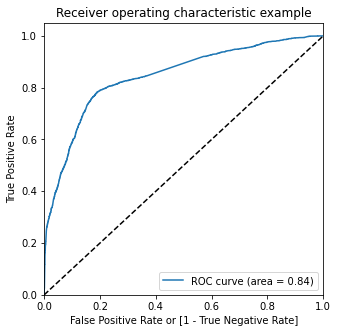

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

Optimal cutoff point is that probability where we get balanced accuracy, sensitivity and specificity

- Let's start by creating columns with different probability cutoffs 

In [127]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  StudentID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.115282        302          0    1    1    0    0    0   
1          0        0.059891       6087          0    1    0    0    0    0   
2          0        0.223420       1033          0    1    1    1    0    0   
3          0        0.061662       7656          0    1    0    0    0    0   
4          1        0.441582       3241          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

Now let's calculate accuracy, sensitivity, and specificity for various probability cutoffs.

In [128]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.444759  0.991763  0.107243
0.2   0.2  0.731887  0.836079  0.667598
0.3   0.3  0.798051  0.785420  0.805845
0.4   0.4  0.803237  0.733526  0.846252
0.5   0.5  0.789250  0.636326  0.883609
0.6   0.6  0.771649  0.539539  0.914867
0.7   0.7  0.751689  0.433690  0.947903
0.8   0.8  0.726387  0.322076  0.975858
0.9   0.9  0.711771  0.259061  0.991105


- Let's plot accuracy, sensitivity, and specificity for various probabilities.

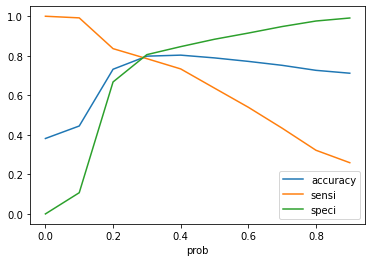

In [129]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- The optimal cut-off seems to be around 0.3, i.e. between 0.25 to 0.35. Let's calculate our evaluation metrics for these values as well.

In [130]:
numbers = [float(x)/100 for x in range(25,36)]
for i in numbers:
    y_train_pred_final_optimized[i]= y_train_pred_final_optimized.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_optimized.head()

Converted  Converted_prob  StudentID  Predicted  0.25  0.26  0.27  0.28  \
0          0        0.115282        302          0     0     0     0     0   
1          0        0.059891       6087          0     0     0     0     0   
2          0        0.223420       1033          0     0     0     0     0   
3          0        0.061662       7656          0     0     0     0     0   
4          1        0.441582       3241          0     1     1     1     1   

   0.29  0.3  0.31  0.32  0.33  0.34  0.35  
0     0    0     0     0     0     0     0  
1     0    0     0     0     0     0     0  
2     0    0     0     0     0     0     0  
3     0    0     0     0     0     0     0  
4     1    1     1     1     1     1     1

- Let's calculate accuracy, sensitivity and specificity for various probability cutoffs from 0.25 to 0.35

In [131]:
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_optimized.Converted, y_train_pred_final_optimized[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.25  0.25  0.777778  0.807249  0.759593
0.26  0.26  0.784064  0.803130  0.772300
0.27  0.27  0.787679  0.796952  0.781957
0.28  0.28  0.792079  0.793245  0.791360
0.29  0.29  0.795694  0.789539  0.799492
0.30  0.30  0.798051  0.785420  0.805845
0.31  0.31  0.800094  0.781713  0.811436
0.32  0.32  0.799937  0.775535  0.814994
0.33  0.33  0.800094  0.769769  0.818806
0.34  0.34  0.801980  0.766063  0.824142
0.35  0.35  0.802452  0.761532  0.827700


- We see 0.28 as the optimal probability as per the graph and table, where all the three metrices; accuracy, sensitivity, and specificity are optimised

    Let's use the same cut-off to generate our 'final_predicted' column which is the conversion tag our logistic regression model predicts

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

Converted  Converted_prob  StudentID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.115282        302          0    1    1    0    0    0   
1          0        0.059891       6087          0    1    0    0    0    0   
2          0        0.223420       1033          0    1    1    1    0    0   
3          0        0.061662       7656          0    1    0    0    0    0   
4          1        0.441582       3241          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                1

- Now, let's calculate the evaluation metrics to compare them with the same obtained our final model

In [133]:
print("Accuracy Score is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy Score is: 0.7920792079207921


In [134]:
confusionFinal = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusionFinal)

[[3114  821]
 [ 502 1926]]


In [135]:
TP = confusionFinal[1,1] # true positive 
TN = confusionFinal[0,0] # true negatives
FP = confusionFinal[0,1] # false positives
FN = confusionFinal[1,0] # false negatives

In [136]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.79
Specificity Score is: 0.79
Positive predictive value is: 0.7
Negative predictive value is: 0.86
False postive rate is: 0.21


Before the optimization using the cut-off

- Sensitivity Score is: 0.64
- Specificity Score is: 0.88
- Positive predictive value is: 0.77
- Negative predictive value is: 0.8
- False postive rate is: 0.12
    
After the optimization

- Sensitivity Score is: 0.79
- Specificity Score is: 0.79
- Positive predictive value is: 0.7
- Negative predictive value is: 0.86
- False postive rate is: 0.21

We see an improvement in the metrics as expected.

### Precision-Recall Curve

- Importing the required library for calculating the P-R score

In [137]:
from sklearn.metrics import precision_score, recall_score

- Calculating the precision and recall score

In [138]:
print("The Precision Score is:", precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print("The Recall Score is:", recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

The Precision Score is: 0.7011285038223517
The Recall Score is: 0.7932454695222405


- Importing the required library for plotting the P-R curve

In [139]:
from sklearn.metrics import precision_recall_curve

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

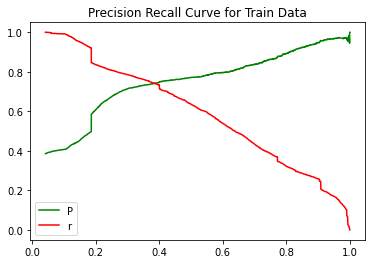

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision Recall Curve for Train Data")
plt.legend('Precision')
plt.show()

# 6. Making predictions on the test set :

- Creating our 'y_test' and 'X_test' dataframes like we did in the train set

In [142]:
y_test= df_test.pop('Converted')
X_test= df_test

- Separating the numerical data types into a different dataframe for scaling

In [143]:
nums = X_test.select_dtypes(include=['int64','float64']).columns
X_test[nums] = scaler.transform(X_test[nums])

- Importing the columns extracted under train set modeling to create our test dataframe, and modeling it

In [144]:
X_test = X_test[col]
X_test_sm=sm.add_constant(X_test)

- Predicting the target variable of our test data using the same model

In [145]:
y_test_pred = lr.fit().predict(X_test_sm)
y_test_pred[:10]

6906    0.700667
1873    0.077546
771     0.112436
4495    0.184448
9061    0.794643
4929    0.600903
2308    0.194767
1034    0.105809
9033    0.157178
7008    0.729622
dtype: float64

- We will now create a new dataframe with the actual and predicted values of our target variable, and use the index of 'y_test' as StudentID

In [146]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred.values})
y_test_pred_final['StudentID'] = y_test.index
y_test_pred_final.head()

Converted  Converted_prob  StudentID
0          1        0.700667       6906
1          0        0.077546       1873
2          0        0.112436        771
3          0        0.184448       4495
4          1        0.794643       9061

- Let us now use the same threshold probability of 0.28 obtained earlier and create a 'final_predicted' column based on the predicted values

In [147]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)
y_test_pred_final.head()

Converted  Converted_prob  StudentID  final_predicted
0          1        0.700667       6906                1
1          0        0.077546       1873                0
2          0        0.112436        771                0
3          0        0.184448       4495                0
4          1        0.794643       9061                1

- Moving on to building the confusion matrix for model evaluation metrics calculation :

In [148]:
print("Accuracy Score is:", metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted))

Accuracy Score is: 0.7924459112577924


In [149]:
confusionTestFinal = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
print(confusionTestFinal)

[[1325  335]
 [ 231  836]]


- We will now obtain the true positives/negatives and false positives/negatives into variables to calculate Accuracy, Sensitivity and other metrics :

In [150]:
TP = confusionTestFinal[1,1] # true positive 
TN = confusionTestFinal[0,0] # true negatives
FP = confusionTestFinal[0,1] # false positives
FN = confusionTestFinal[1,0] # false negatives

In [151]:
print("Sensitivity Score is:", round(TP / float(TP+FN), 2))
print("Specificity Score is:", round(TN / float(TN+FP), 2))
print ("Positive predictive value is:", round(TP / float(TP+FP), 2))
print ("Negative predictive value is:", round(TN / float(TN+ FN), 2))
print("False postive rate is:", round(FP/ float(TN+FP), 2))

Sensitivity Score is: 0.78
Specificity Score is: 0.8
Positive predictive value is: 0.71
Negative predictive value is: 0.85
False postive rate is: 0.2


### Plotting the ROC curve for Test data

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted, 
                                         y_test_pred_final.Converted_prob, drop_intermediate = False)

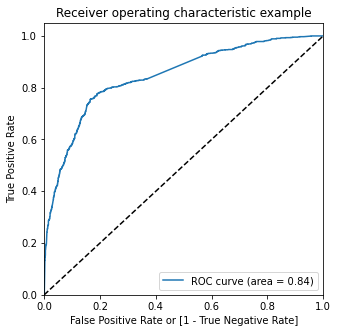

In [153]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_prob)

### Precision-Recall Curve for Test data

- Calculating Precision Recall Score for the Test data to plot the curve

In [154]:
print("The Precision Score is:", precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted))
print("The Recall Score is:", recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted))

The Precision Score is: 0.7139197267292912
The Recall Score is: 0.7835051546391752


In [155]:
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_prob)

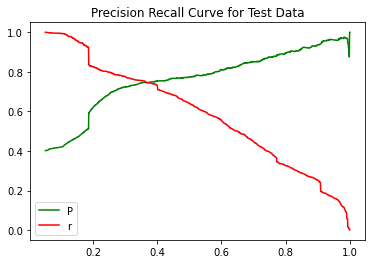

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision Recall Curve for Test Data")
plt.legend('Precision')
plt.show()

### Calculating the Score Variable

- We need to calculate the Score variable which is nothing but the percentage of probability

In [157]:
y_test_pred_final['Score'] = y_test_pred_final.Converted_prob*100
y_test_pred_final.head()

Converted  Converted_prob  StudentID  final_predicted      Score
0          1        0.700667       6906                1  70.066685
1          0        0.077546       1873                0   7.754593
2          0        0.112436        771                0  11.243618
3          0        0.184448       4495                0  18.444840
4          1        0.794643       9061                1  79.464310

# 7. Final Observations

Comparing the evaluation metrics for our Train and Test data set:
    
- **Train Set:**

- Accuracy Score is: 0.79
- Sensitivity Score is: 0.79
- Specificity Score is: 0.79
- Positive predictive value is: 0.7
- Negative predictive value is: 0.86
- False postive rate is: 0.21


- **Test Set:**

- Accuracy Score is: 0.79
- Sensitivity Score is: 0.78
- Specificity Score is: 0.8
- Positive predictive value is: 0.71
- Negative predictive value is: 0.85
- False postive rate is: 0.2

With great evaluation metrics this model predicts the conversion rate very well. The sales team can use this model to improve their conversion rate.